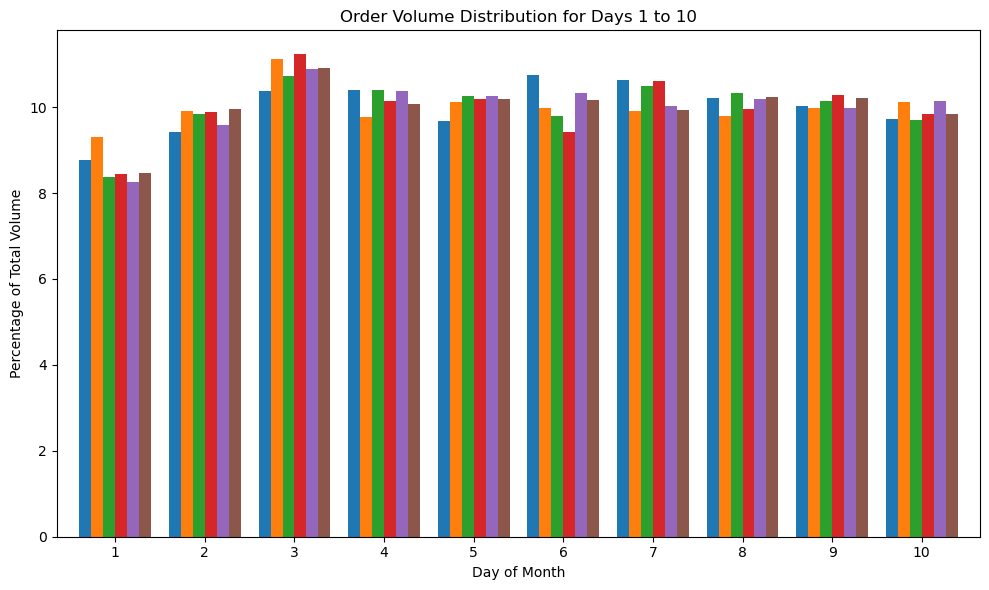

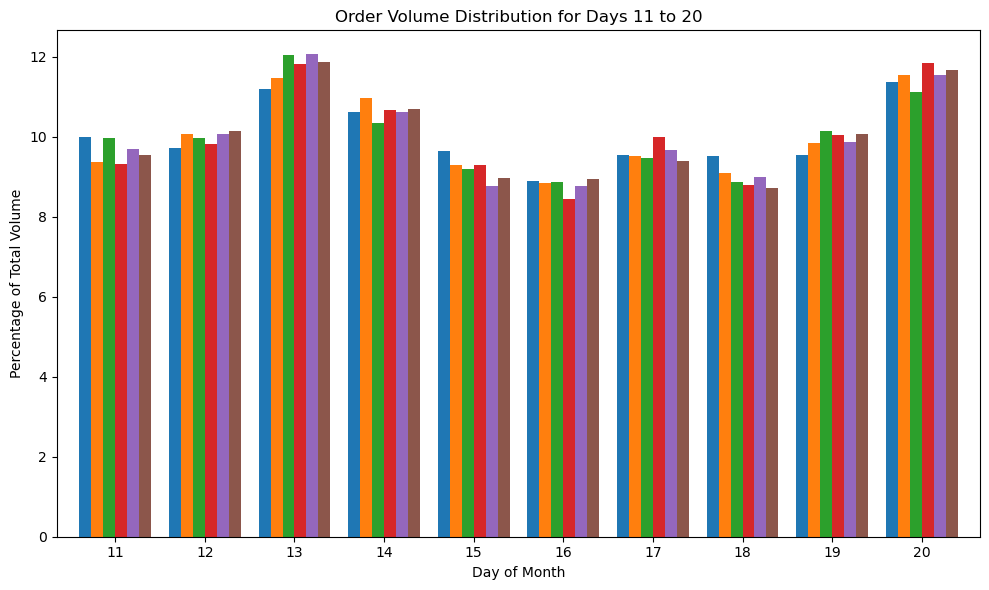

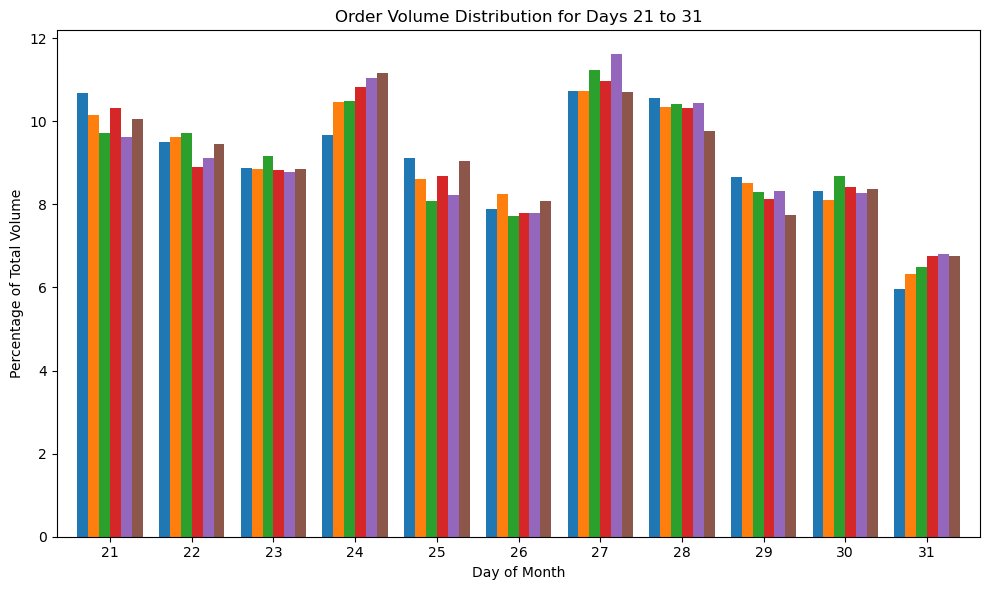

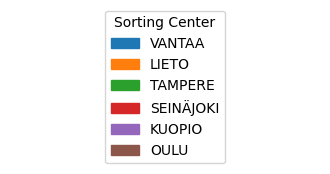

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# enter the path to the CSV data file
file_path = r"C:\Users\Sun Dexin\Desktop\SHUJU\sorting_event_volumes_2023.csv"

# Read the CSV file from the specified path
data = pd.read_csv(file_path)

# Ensure the 'scanning_date' column is recognized as a date type
data['scanning_date'] = pd.to_datetime(data['scanning_date'])

# Extract the day of the month from the 'scanning_date' column
data['day_of_month'] = data['scanning_date'].dt.day

# Define a function to categorize days into three segments (1-10, 11-20, 21-31)
def categorize_day(day):
    if day <= 10:
        return '1-10'
    elif 11 <= day <= 20:
        return '11-20'
    else:
        return '21-31'

# Apply the categorization function to the 'day_of_month' column
data['day_segment'] = data['day_of_month'].apply(categorize_day)

# Extract unique sorting centers from the dataset
sorting_centers = data['sorting_center_name'].unique()

# Define consistent colors using the same colormap for both the charts and legend
colors = plt.get_cmap('tab10').colors


def plot_data_for_segment_without_legend(segment, title):
    segment_data = data[data['day_segment'] == segment]
    result = pd.DataFrame()

    for i, center in enumerate(sorting_centers):
        center_data = segment_data[segment_data['sorting_center_name'] == center]
        daily_volume = center_data.groupby('day_of_month')['no_of_events'].sum()
        percentage = (daily_volume / daily_volume.sum()) * 100
        result[center] = percentage


    result.plot(kind='bar', figsize=(10, 6), width=0.8, color=colors[:len(sorting_centers)], legend=False)
    plt.title(f'Order Volume Distribution for {title}')
    plt.xlabel('Day of Month')
    plt.ylabel('Percentage of Total Volume')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


def plot_legend_only():
    fig, ax = plt.subplots(figsize=(4, 2))
    fig.patch.set_visible(False)
    ax.axis('off')


    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(sorting_centers))]
    ax.legend(handles, sorting_centers, title='Sorting Center', loc='center', ncol=1, prop={'size': 10})
    plt.show()


plot_data_for_segment_without_legend('1-10', 'Days 1 to 10')
plot_data_for_segment_without_legend('11-20', 'Days 11 to 20')
plot_data_for_segment_without_legend('21-31', 'Days 21 to 31')


plot_legend_only()











In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# enter the path to the CSV data file
file_path = input("Please enter the path to your data file (e.g., C:/path/to/your/sorting_event_volumes_2023.csv): ")

# Read the CSV file from the specified path
data = pd.read_csv(file_path)

# Ensure the 'scanning_date' column is recognized as a date type
data['scanning_date'] = pd.to_datetime(data['scanning_date'])

# Extract the day of the month from the 'scanning_date' column
data['day_of_month'] = data['scanning_date'].dt.day

# Define a function to categorize days into three segments (1-10, 11-20, 21-31)
def categorize_day(day):
    if day <= 10:
        return '1-10'
    elif 11 <= day <= 20:
        return '11-20'
    else:
        return '21-31'

# Apply the categorization function to the 'day_of_month' column
data['day_segment'] = data['day_of_month'].apply(categorize_day)

# Extract unique sorting centers from the dataset
sorting_centers = data['sorting_center_name'].unique()

# Define consistent colors using the same colormap for both the charts and legend
colors = plt.get_cmap('tab10').colors


def plot_data_for_segment_without_legend(segment, title):
    segment_data = data[data['day_segment'] == segment]
    result = pd.DataFrame()

    for i, center in enumerate(sorting_centers):
        center_data = segment_data[segment_data['sorting_center_name'] == center]
        daily_volume = center_data.groupby('day_of_month')['no_of_events'].sum()
        percentage = (daily_volume / daily_volume.sum()) * 100
        result[center] = percentage


    result.plot(kind='bar', figsize=(10, 6), width=0.8, color=colors[:len(sorting_centers)], legend=False)
    plt.title(f'Order Volume Distribution for {title}')
    plt.xlabel('Day of Month')
    plt.ylabel('Percentage of Total Volume')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


def plot_legend_only():
    fig, ax = plt.subplots(figsize=(4, 2))
    fig.patch.set_visible(False)
    ax.axis('off')


    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(sorting_centers))]
    ax.legend(handles, sorting_centers, title='Sorting Center', loc='center', ncol=1, prop={'size': 10})
    plt.show()


plot_data_for_segment_without_legend('1-10', 'Days 1 to 10')
plot_data_for_segment_without_legend('11-20', 'Days 11 to 20')
plot_data_for_segment_without_legend('21-31', 'Days 21 to 31')


plot_legend_only()